## Import and Load data file

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/E-Commerce-Chatbot-master/Chatbot/

/content/drive/MyDrive/E-Commerce-Chatbot-master/Chatbot


In [3]:
import nltk
from nltk.stem import WordNetLemmatizer
import json
import pickle

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random

from keras.models import load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
lemmatizer = WordNetLemmatizer()

words = []
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('data.json').read()
intents = json.loads(data_file)

In [5]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Pre-process data

Here we iterate through the patterns and tokenize the sentence using nltk.word_tokenize() function and append each word in the words list. We also create a list of classes for our tags.

In [6]:
for intent in intents['intents']:
    for pattern in intent['patterns']:

        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))

        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

lemmatize each word and remove duplicate words from the list

In [7]:
# lemmatize, lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents")
# classes = intents
print (len(classes), "classes", classes)
# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)

pickle.dump(words, open('words.pkl','wb'))
pickle.dump(classes, open('classes.pkl','wb'))
pickle.dump(intents, open('intents.pkl','wb'))

1147 documents
77 classes ['armchair_information', 'bachelors_chest_information', 'bureau_flat_desk_information', 'butterfly_dining_table_information', 'cancel', 'canopy_bed_information', 'chest_nightstand_information', 'chest_on_chest_information', 'cheval_mirror_dresser_information', 'classic_nightstand_information', 'confirm', 'console_tv_stand_information', 'corner_tv_stand_information', 'delay', 'delivery', 'discounts', 'double_dresser_information', 'drop_leaf_dining_table_information', 'executive_desk_information', 'floating_tv_stand_information', 'four_poster_bed_information', 'gateleg_table_information', 'general_feedback', 'goodbye', 'greeting', 'hutch_tv_stand_information', 'items', 'laptop_desk_information', 'lost password', 'lowboy_chest_information', 'media_dresser_information', 'mid_century_modern_nightstand_information', 'mid_century_tv_stand_information', 'mission_style_bed_information', 'mobile app', 'more', 'murphy_bed_information', 'negative_feedback', 'nightstand_wi

## Create training and testing data

In [8]:
training = []

# create an empty array for our output
output_empty = [0] * len(classes)

for doc in documents:

    # initialize our bag of words
    bag = [0] * len(words)

    # list of tokenized words for the pattern
    pattern_words = doc[0]

    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]

    # create our bag of words array with 1, if word match found in current pattern
    for i, w in enumerate(words):
        if w in pattern_words:
            bag[i] = 1

    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

In [9]:
random.shuffle(training)

train_data, val_data = train_test_split(training, test_size=0.2, random_state=42)

train_x = np.array([element[0] for element in train_data], dtype=np.float32)
train_y = np.array([element[1] for element in train_data], dtype=np.float32)

val_x = np.array([element[0] for element in val_data], dtype=np.float32)
val_y = np.array([element[1] for element in val_data], dtype=np.float32)

## Create Model & train model

In [10]:
INPUT_SHAPE = train_x.shape[1]
CLASSES = train_y.shape[1]

In [11]:

model = Sequential()
model.add(Dense(128, input_shape=(INPUT_SHAPE,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(CLASSES, activation='softmax'))

sgd = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#fitting and saving the model
hist = model.fit(
    train_x,
    train_y,
    validation_data=(val_x, val_y),
    epochs=100,
    batch_size=5
    )

model.save('chatbot_model.h5', hist)

print("model created")

Epoch 1/100
184/184 [==============================] - 4s 5ms/step - loss: 4.3377 - accuracy: 0.0174 - val_loss: 4.3297 - val_accuracy: 0.0174
Epoch 2/100
184/184 [==============================] - 1s 5ms/step - loss: 4.3229 - accuracy: 0.0131 - val_loss: 4.3175 - val_accuracy: 0.0174
Epoch 3/100
184/184 [==============================] - 1s 5ms/step - loss: 4.3027 - accuracy: 0.0294 - val_loss: 4.3040 - val_accuracy: 0.0261
Epoch 4/100
184/184 [==============================] - 1s 6ms/step - loss: 4.2833 - accuracy: 0.0425 - val_loss: 4.2890 - val_accuracy: 0.0391
Epoch 5/100
184/184 [==============================] - 1s 6ms/step - loss: 4.2606 - accuracy: 0.0447 - val_loss: 4.2699 - val_accuracy: 0.0522
Epoch 6/100
184/184 [==============================] - 1s 5ms/step - loss: 4.2256 - accuracy: 0.0654 - val_loss: 4.2438 - val_accuracy: 0.0565
Epoch 7/100
184/184 [==============================] - 1s 4ms/step - loss: 4.1985 - accuracy: 0.0600 - val_loss: 4.2150 - val_accuracy: 0.0609

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


model created


In [12]:
def plot_history(history):
    hist = history.history
    plt.subplots(1,2,figsize=(16,8))

    # Loss
    plt.subplot(1,2,1)
    plt.plot(range(len(hist['loss'])), hist['loss'], label='Train')
    plt.plot(range(len(hist['val_loss'])), hist['val_loss'], label='Validation')
    plt.xlabel('Epochs', fontsize=16, labelpad=20)
    plt.ylabel('Loss', fontsize=16, labelpad=20)
    plt.legend()
    plt.title('Loss Over Epochs', fontsize=20, pad=20)

    # Accuracy
    plt.subplot(1,2,2)
    plt.plot(range(len(hist['accuracy'])), hist['accuracy'], label='Train')
    plt.plot(range(len(hist['val_accuracy'])), hist['val_accuracy'], label='Validation')
    plt.xlabel('Epochs', fontsize=16, labelpad=20)
    plt.ylabel('Accuracy', fontsize=16, labelpad=20)
    plt.legend()
    plt.title('Accuracy Over Epochs', fontsize=20, pad=20)
    plt.savefig('model_history.jpg', dpi=300)

    plt.show()


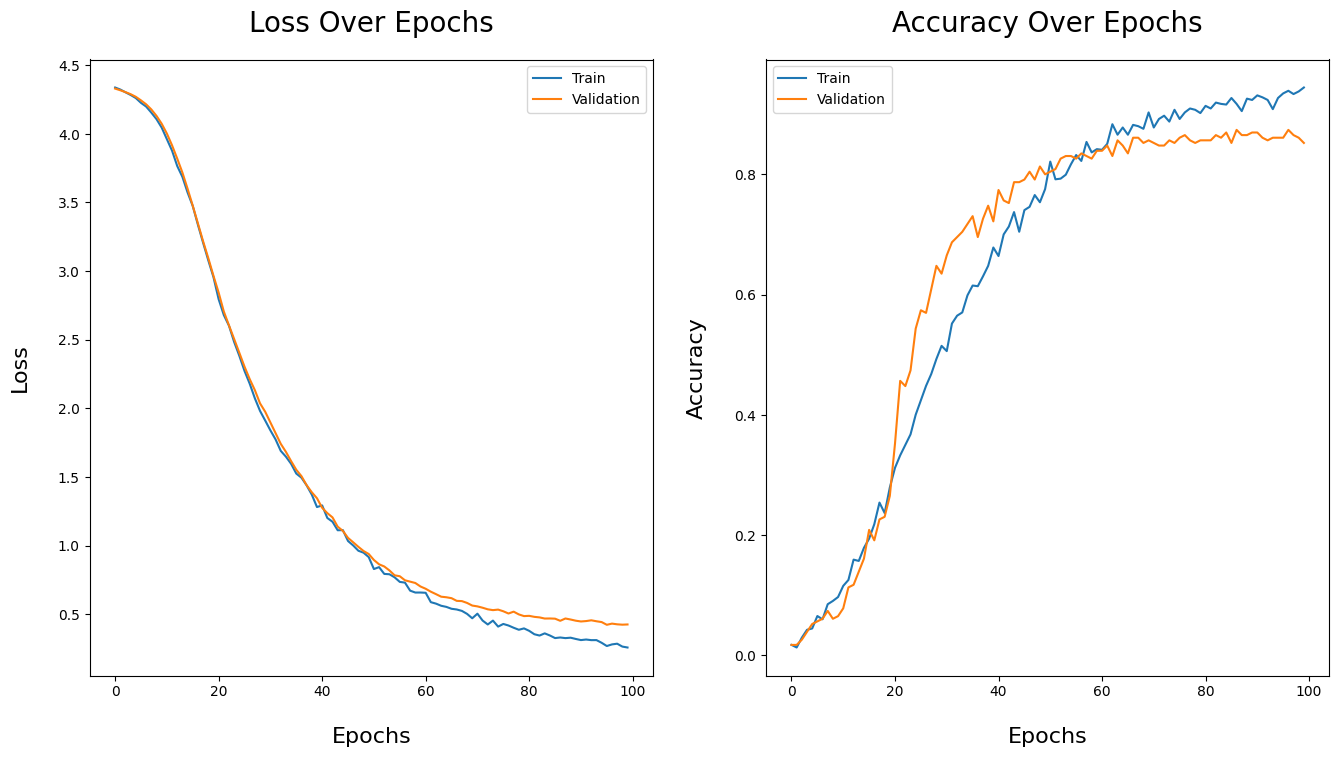

In [13]:
plot_history(hist)

## Simulation

In [14]:
model = load_model('chatbot_model.h5')

intents = pickle.load(open('intents.pkl', 'rb'))
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

In [15]:
def clean_up_sentence(sentence):

    # tokenize the pattern - split words into array
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word - create short form for word
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]

    return sentence_words
# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence

In [16]:
def bow(sentence, words, show_details=False):

    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix

    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)

    return(np.array(bag))

In [17]:
def predict_class(sentence, model):

    # filter out predictions below a threshold
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]

    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})

    return return_list

In [18]:
def getResponse(ints, intents_json):

    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']

    result = "I'm sorry, I don't understand your request."

    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break

    return result

In [19]:
def chatbot_response(text):

    ints = predict_class(text, model)
    res = getResponse(ints, intents)

    return res

In [20]:
text = 'where is your store?'
print(chatbot_response(text))

1/1 [==============================] - 0s 115ms/step
The store address is 123 Street Road. Drop by anytime during our working hours!


In [21]:
text = 'tell me more about Pedestal please'
print(chatbot_response(text))

1/1 [==============================] - 0s 16ms/step
The Pedestal Desk may be available in different sizes to suit your workspace requirements.


In [22]:
text = 'What do you sell??'
print(chatbot_response(text))

1/1 [==============================] - 0s 18ms/step
We offer a wide variety of house furniture, including wooden chairs, beds, and other items. Use the search bar on our website to browse our selection. For further details, visit our store page.
